# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [9]:
features = fraud.drop(columns = ["used_chip"]) 
target = fraud["used_chip"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [11]:
log_reg = LogisticRegression()

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np = scaler.transform(X_test)

In [19]:
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [21]:
log_reg.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [23]:
log_reg.score(X_test_scaled_df, y_test)

0.649344

In [25]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79    162368
         1.0       0.46      0.00      0.00     87632

    accuracy                           0.65    250000
   macro avg       0.55      0.50      0.40    250000
weighted avg       0.58      0.65      0.51    250000



In [27]:
train = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

In [29]:
train["used_chip"] = y_train.values

In [31]:
chip = train[train["used_chip"] == 1]
no_chip = train[train["used_chip"] == 0]

In [33]:
len(chip),len(no_chip)

(262767, 487233)

In [37]:
yes_oversampled = resample(chip,
                                    replace=True,
                                    n_samples = len(no_chip),
                                    random_state=0)

In [39]:
chip_over = pd.concat([yes_oversampled, no_chip])
chip_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_pin_number,online_order,fraud,used_chip
835291,-0.367171,-0.170543,-0.536564,0.366317,-0.334756,0.732342,-0.309794,1.0
516636,-0.255932,-0.163323,-0.094758,0.366317,-0.334756,0.732342,-0.309794,1.0
670807,1.100875,-0.182779,-0.608376,0.366317,-0.334756,0.732342,-0.309794,1.0
20505,-0.212795,-0.086618,0.257366,0.366317,-0.334756,-1.365482,-0.309794,1.0
89998,-0.392285,-0.028847,-0.522818,-2.729877,-0.334756,0.732342,-0.309794,1.0
...,...,...,...,...,...,...,...,...
359783,-0.339408,-0.154742,-0.439822,0.366317,-0.334756,-1.365482,-0.309794,0.0
963395,0.683502,-0.071124,-0.607568,0.366317,-0.334756,0.732342,-0.309794,0.0
117952,-0.358147,0.292591,0.107062,0.366317,-0.334756,0.732342,-0.309794,0.0
435829,0.002289,-0.023247,-0.478098,0.366317,2.987249,-1.365482,-0.309794,0.0


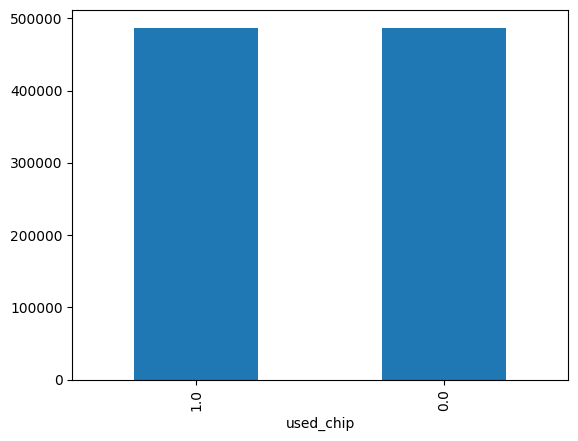

In [43]:
chip_plt = chip_over["used_chip"].value_counts()
chip_plt.plot(kind="bar")
plt.show()

In [45]:
X_chip_over = chip_over.drop(columns = ["used_chip"])
y_chip_over = chip_over["used_chip"]

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_chip_over, y_chip_over)

LogisticRegression()

In [49]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.35      0.46    162368
         1.0       0.36      0.68      0.47     87632

    accuracy                           0.47    250000
   macro avg       0.52      0.52      0.47    250000
weighted avg       0.56      0.47      0.47    250000



In [51]:
no_undersampled = resample(no_chip,
                                    replace=False,
                                    n_samples = len(chip),
                                    random_state=0)
no_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_pin_number,online_order,fraud,used_chip
899836,-0.362061,-0.165498,-0.523886,0.366317,-0.334756,0.732342,-0.309794,0.0
312544,1.312928,-0.097010,-0.042513,0.366317,2.987249,0.732342,-0.309794,0.0
724361,-0.333798,-0.165853,3.411240,0.366317,-0.334756,0.732342,3.227955,0.0
602538,-0.364486,-0.103087,2.552480,0.366317,-0.334756,-1.365482,-0.309794,0.0
308356,0.237653,-0.118334,1.352958,0.366317,-0.334756,0.732342,3.227955,0.0
...,...,...,...,...,...,...,...,...
78194,-0.380051,-0.149438,0.107727,0.366317,-0.334756,-1.365482,-0.309794,0.0
204280,-0.234989,-0.160342,-0.495726,0.366317,-0.334756,0.732342,-0.309794,0.0
769274,-0.159246,-0.179736,-0.034594,0.366317,-0.334756,0.732342,-0.309794,0.0
761936,1.584852,-0.184412,0.606603,0.366317,-0.334756,0.732342,3.227955,0.0


In [53]:
chip_under = pd.concat([no_chip, chip])
chip_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_pin_number,online_order,fraud,used_chip
558507,-0.369867,-0.169775,-0.575465,0.366317,2.987249,0.732342,-0.309794,0.0
158940,-0.121861,-0.184870,-0.164475,0.366317,2.987249,0.732342,-0.309794,0.0
899368,0.025834,-0.170716,-0.475390,0.366317,-0.334756,0.732342,-0.309794,0.0
194272,-0.363015,0.052723,0.154731,0.366317,-0.334756,-1.365482,-0.309794,0.0
893793,-0.344046,-0.064202,-0.363425,0.366317,-0.334756,0.732342,-0.309794,0.0
...,...,...,...,...,...,...,...,...
610581,-0.256646,-0.121686,0.308647,0.366317,-0.334756,0.732342,-0.309794,1.0
122579,-0.403169,-0.175513,-0.539966,-2.729877,-0.334756,-1.365482,-0.309794,1.0
882371,0.274770,1.008882,-0.226073,0.366317,-0.334756,0.732342,-0.309794,1.0
152315,0.703621,0.062145,0.036718,0.366317,-0.334756,-1.365482,-0.309794,1.0


In [55]:
X_chip_under = chip_under.drop(columns = ["used_chip"])
y_chip_under = chip_under["used_chip"]

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_chip_under, y_chip_under)

LogisticRegression()

In [61]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79    162368
         1.0       0.46      0.00      0.00     87632

    accuracy                           0.65    250000
   macro avg       0.55      0.50      0.40    250000
weighted avg       0.58      0.65      0.51    250000



In [ ]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [ ]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train_scaled_df,y_train)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

In [ ]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))